In [1]:
#Importing PySpark
from pyspark.sql import SparkSession


In [2]:
#Sating Apache Session
spark = (
    SparkSession.builder.appName('Curso de Pyspark ')
    .config('spark.sql.repl.eagerEval.enabled',True)
    .getOrCreate()
)

In [3]:
df = spark.read.csv('databases\LOGINS.csv', sep = ';', header=True)

In [4]:
df.show()

+--------------+--------------------+----------+------------------+------+-------------+---------------+------------+--------------------+-------------------+
|           cpf|               email|     senha|data_de_nascimento|estado|data_cadastro|           ipv4|cor_favorita|           profissao|           telefone|
+--------------+--------------------+----------+------------------+------+-------------+---------------+------------+--------------------+-------------------+
|981.507.362-12|pedro-lucas53@gma...|+7^7E%xFBc|        2006-12-18|    RR|   2023-02-26| 99.107.250.210|        Roxo|    Jogador De Golfe|       31 7785-4046|
|493.705.168-75|rezendeisaac@hotm...|_O_2GRnGOe|        1992-06-17|    GO|   2023-02-16|  197.11.26.213|       Ciano|Atleta De Arremes...|    (031) 0803-6753|
|398.471.625-73|felipepires@uol.c...|*Aw5EOAvy9|        1921-11-11|    MG|   2023-01-02|   181.90.63.58|        Azul|      Papiloscopista|       11 9674-0553|
|092.618.354-06|stellamoraes@bol....|mw0AWYAs#

In [5]:
#Using Parquet
df2 = spark.read.parquet('databases\LOGINS.parquet')

# Query

In [6]:
#Creating a Query
df2.select('data_de_nascimento','estado')

data_de_nascimento,estado
2006-12-18,RR
1992-06-17,GO
1921-11-11,MG
2021-06-01,AC
1969-10-28,AP
1986-05-19,MG
2018-04-20,MG
1996-05-12,SE
2021-10-05,PA
1917-01-05,MT


In [7]:
#Second way to create a Query
# (df2
    #  .select(df2.cpf)
    #  )

#Third option to create a Query
    # df2.select(df2['cpf'])

#Forth way to create a selection
    # from pyspark.sql.functions import  col
    # import pyspark.sql.functions as F
    # df2.select(F.col('data_de_nascimento'))

#Select all columns
    #df2.select('*')

#Select all except one
    #df2.drop('cpf')


# Filtering Values

In [8]:
#Filtering values
df2.filter(df2['estado']=='MG')

#Second Option to Filter
    #DF3 = df2[df2['estado']=='MG']
    #DF3.describe
    
#Third option to use Filter
    #df2.where(df2.cor_favorita.isin('Ciano')).filter(df.estado == 'GO')


# Good practicie of multiples filters
    # (df2
    # .where(df2.estado == 'MG')
    # .where(df2.profissao == 'Tenente')
    # )




cpf,email,senha,data_de_nascimento,estado,data_cadastro,ipv4,cor_favorita,profissao,telefone
398.471.625-73,felipepires@uol.c...,*Aw5EOAvy9,1921-11-11,MG,2023-01-02,181.90.63.58,Azul,Papiloscopista,11 9674-0553
218.795.460-94,da-conceicaodavi-...,uhBbFxPA&9,1986-05-19,MG,2023-03-07,192.93.0.24,Rosa,Taxista,+55 84 0652 9691
715.836.940-48,efreitas@bol.com.br,s#q9VZt&xl,2018-04-20,MG,2023-01-13,76.251.188.148,Branco,Produtor De Audio...,+55 (084) 1363 0052
348.215.690-51,omoreira@bol.com.br,!8maDkdVnY,2008-10-24,MG,2023-02-20,177.2.242.176,Verde Escuro,Adestrador De Ani...,+55 61 3217-9930
137.964.520-43,natalia72@ig.com.br,i71MdCj2*^,1939-06-26,MG,2023-02-03,141.28.225.40,Branco,Espeleologista,(041) 8471 8007
790.482.315-23,noaharagao@hotmai...,#i_LhbOX52,1922-03-19,MG,2023-01-25,170.188.237.119,Preto,Empacotador,+55 (031) 9156-3903
872.041.936-87,fsilva@yahoo.com.br,B+E9r_CkU^,1926-05-20,MG,2023-01-04,220.1.100.77,Marrom,Mecânico De Vôo,(031) 9834-4568
832.714.650-53,ijesus@gmail.com,JLr@1Mlr!Z,1983-05-21,MG,2023-01-25,84.142.120.51,Roxo,Ministro,81 9463-7374
529.610.873-68,barbosajuliana@bo...,$!3Td!uO%^,2016-09-03,MG,2023-02-15,85.36.21.190,Amarelo,Lenhador,(061) 3713 1708
198.256.734-19,valentina08@ig.co...,@BJV)ATd!8,1962-01-11,MG,2023-02-23,4.122.66.211,Verde,Atuário,71 4313-7632


# WithColumn


In [9]:
import pyspark.sql.functions as F

# df2_transformed = (df2.withColumn('nome_estados',
#     F.when(col('estado') == 'AC', 'Acre')
#     .when(col('estado') == 'AL', 'Alagoas')
#     .when(col('estado') == 'AP', 'Amapá')
#     .when(col('estado') == 'AM', 'Amazonas')
#     .when(col('estado') == 'BA', 'Bahia')
#     .when(col('estado') == 'CE', 'Ceará')
#     .when(col('estado') == 'DF', 'Distrito Federal')
#     .when(col('estado') == 'ES', 'Espírito Santo')
#     .when(col('estado') == 'GO', 'Goiás')
#     .when(col('estado') == 'MA', 'Maranhão')
#     .when(col('estado') == 'MT', 'Mato Grosso')
#     .when(col('estado') == 'MS', 'Mato Grosso do Sul')
#     .when(col('estado') == 'MG', 'Minas Gerais')
#     .when(col('estado') == 'PA', 'Pará')
#     .when(col('estado') == 'PB', 'Paraíba')
#     .when(col('estado') == 'PR', 'Paraná')
#     .when(col('estado') == 'PE', 'Pernambuco')
#     .when(col('estado') == 'PI', 'Piauí')
#     .when(col('estado') == 'RJ', 'Rio de Janeiro')
#     .when(col('estado') == 'RN', 'Rio Grande do Norte')
#     .when(col('estado') == 'RS', 'Rio Grande do Sul')
#     .when(col('estado') == 'RO', 'Rondônia')
#     .when(col('estado') == 'RR', 'Roraima')
#     .when(col('estado') == 'SC', 'Santa Catarina')
#     .when(col('estado') == 'SP', 'São Paulo')
#     .when(col('estado') == 'SE', 'Sergipe')
#     .when(col('estado') == 'TO', 'Tocantins')
#     .otherwise('Demais')
# )
# .withColumn('flagrosa',F.when(F.col('cor_favorita') == 'Rosa',1).otherwise(0))

# )

# df2_transformed.show()


In [10]:
dfUsers = df2

# String Manipulation


In [11]:
(
    dfUsers
    .withColumn('usuário',F.split('email','@').getItem(0))
    .withColumn('provedor',F.split('email','@').getItem(1))
    .withColumn('nome_provedor',F.split(F.col('provedor'),'\.').getItem(0))
    .select('data_de_nascimento','estado','profissao', 'provedor','nome_provedor' )
    .where(F.col('nome_provedor') == 'uol')
    .show()
    
)

+------------------+------+--------------------+----------+-------------+
|data_de_nascimento|estado|           profissao|  provedor|nome_provedor|
+------------------+------+--------------------+----------+-------------+
|        1921-11-11|    MG|      Papiloscopista|uol.com.br|          uol|
|        2008-11-04|    GO| Promotor De Eventos|uol.com.br|          uol|
|        2016-06-09|    MS|         Diagramador|uol.com.br|          uol|
|        1934-11-26|    AM|           Triatleta|uol.com.br|          uol|
|        1958-04-06|    AC|         Kite-Surfer|uol.com.br|          uol|
|        2018-11-25|    MS|          Revendedor|uol.com.br|          uol|
|        1991-03-05|    PE|         Retificador|uol.com.br|          uol|
|        1982-07-26|    RJ|           Diplomata|uol.com.br|          uol|
|        1910-04-02|    CE|            Sargento|uol.com.br|          uol|
|        1941-08-25|    PI|     Ginasta Rítmica|uol.com.br|          uol|
|        1936-01-31|    RR|  Jogador D

In [12]:

(
df2
.withColumn('concat',F.concat(df2.profissao,df2.cor_favorita))
.withColumn('concat2',F.concat(df2.estado,F.lit(' -Brasil')))
.withColumn('lower',F.lower(df2.profissao))
.withColumn('initcap',F.initcap(df2.profissao))
.withColumn('substring',F.substring(df2.cor_favorita,1,100))
.withColumn('format_string',F.format_string('Olá, sua cor favorita é  %s',df2.cor_favorita)) 
.withColumn('instr',F.instr(df2.email,'@'))
.withColumn('Lenth',F.length(df2.profissao))
.withColumn('repeat',F.repeat(df2.estado,5))
.withColumn('lpad',F.trim(df2.profissao))
# .select('lpad',F.lpad(df2.cor_favorita,10,'>'))
.show(10)
)

+--------------+--------------------+----------+------------------+------+-------------+---------------+------------+--------------------+-------------------+--------------------+----------+--------------------+--------------------+---------+--------------------+-----+-----+----------+--------------------+
|           cpf|               email|     senha|data_de_nascimento|estado|data_cadastro|           ipv4|cor_favorita|           profissao|           telefone|              concat|   concat2|               lower|             initcap|substring|       format_string|instr|Lenth|    repeat|                lpad|
+--------------+--------------------+----------+------------------+------+-------------+---------------+------------+--------------------+-------------------+--------------------+----------+--------------------+--------------------+---------+--------------------+-----+-----+----------+--------------------+
|981.507.362-12|pedro-lucas53@gma...|+7^7E%xFBc|        2006-12-18|    RR|  

# Funções Numéricas


In [107]:
dfIMC = spark.read.parquet('./databases/IMC.parquet''')

In [14]:
(

    dfIMC
    .withColumn('round',F.round(dfIMC.peso,1))
    .withColumn('ceil',F.ceil(dfIMC.peso))
    .withColumn('floor',F.floor(dfIMC.peso))
    .withColumn('altura_negativa',-F.col('altura'))
    .withColumn('pow',F.pow(dfIMC.peso,2))
)

nome,altura,peso,round,ceil,floor,altura_negativa,pow
Pietra Fernandes,176,97.88,97.9,98,97,-176,9580.4944
Ana Júlia da Rosa,163,80.56,80.6,81,80,-163,6489.913600000001
Fernando Martins,150,85.55,85.6,86,85,-150,7318.8025
Isis Silveira,173,70.1,70.1,71,70,-173,4914.009999999999
Cecília Porto,190,93.42,93.4,94,93,-190,8727.296400000001
Sra. Bruna Almeida,198,73.07,73.1,74,73,-198,5339.224899999999
Maria Julia Silva,170,71.36,71.4,72,71,-170,5092.2496
Pedro Henrique da...,188,105.57,105.6,106,105,-188,11145.024899999999
Davi Lucas Campos,180,98.49,98.5,99,98,-180,9700.280099999998
Juan Gonçalves,175,71.87,71.9,72,71,-175,5165.2969


# Date Operations

In [108]:
dfDate = spark.read.parquet('./databases/LOGINS.parquet')

In [16]:
dfDate = dfDate.select('data_de_nascimento','data_cadastro')
dfDate.show(10)

+------------------+-------------+
|data_de_nascimento|data_cadastro|
+------------------+-------------+
|        2006-12-18|   2023-02-26|
|        1992-06-17|   2023-02-16|
|        1921-11-11|   2023-01-02|
|        2021-06-01|   2023-01-08|
|        1969-10-28|   2023-02-14|
|        1986-05-19|   2023-03-07|
|        2018-04-20|   2023-01-13|
|        1996-05-12|   2023-02-04|
|        2021-10-05|   2023-03-02|
|        1917-01-05|   2023-02-21|
+------------------+-------------+
only showing top 10 rows



In [17]:
(
    dfDate
    .withColumn('add_months', F.add_months(dfDate.data_cadastro,1))
    .withColumn('remove_months', F.add_months(dfDate.data_cadastro,-1))
    .withColumn('Current_date', F.current_date())
    .withColumn('Current_timestamp', F.current_timestamp())
    .withColumn('date_add',F.date_add(dfDate.data_cadastro,10))
    .withColumn('remove_date',F.date_add(dfDate.data_cadastro,-10))
    .withColumn('date_sub',F.date_sub(dfDate.data_cadastro,10))
    .withColumn('date_format',F.date_format(dfDate.data_de_nascimento,'d/M/y'))
    .withColumn('date_diff',F.datediff(F.current_date(),dfDate.data_de_nascimento))
    .withColumn('DayOfMonth',F.dayofmonth(dfDate.data_de_nascimento))
    .withColumn('DayOfWeek',F.dayofweek(dfDate.data_de_nascimento))
    .withColumn('WeekOfYear',F.weekofyear(dfDate.data_de_nascimento))
    .withColumn('year',F.year(dfDate.data_de_nascimento))
    .withColumn('month',F.month(dfDate.data_de_nascimento))
    .withColumn('last_day',F.last_day(dfDate.data_de_nascimento))
    .withColumn('months_between',F.months_between(F.current_date(),dfDate.data_de_nascimento))
    .withColumn('next_day',F.next_day(dfDate.data_cadastro,'Mon'))
    .withColumn('make_date',F.make_date(F.lit(2020),F.lit(4),F.lit(2)))
    .withColumn('to_date',F.to_date(F.lit('2020-09-01')))
    .show(2)
)

+------------------+-------------+----------+-------------+------------+--------------------+----------+-----------+----------+-----------+---------+----------+---------+----------+----+-----+----------+--------------+----------+----------+----------+
|data_de_nascimento|data_cadastro|add_months|remove_months|Current_date|   Current_timestamp|  date_add|remove_date|  date_sub|date_format|date_diff|DayOfMonth|DayOfWeek|WeekOfYear|year|month|  last_day|months_between|  next_day| make_date|   to_date|
+------------------+-------------+----------+-------------+------------+--------------------+----------+-----------+----------+-----------+---------+----------+---------+----------+----+-----+----------+--------------+----------+----------+----------+
|        2006-12-18|   2023-02-26|2023-03-26|   2023-01-26|  2024-01-10|2024-01-10 09:07:...|2023-03-08| 2023-02-16|2023-02-16| 18/12/2006|     6232|        18|        2|        51|2006|   12|2006-12-31|  204.74193548|2023-02-27|2020-04-02|2020

# Data Manipulation

In [109]:
dfDM = spark.read.parquet('./databases/LOGINS.parquet')

## Order By

In [19]:
(

dfDM
.orderBy(F.desc('email'))
#.orderBy('estado','data_cadastro')
.show(3)

)

+--------------+-------------------+----------+------------------+------+-------------+-------------+------------+------------+-------------------+
|           cpf|              email|     senha|data_de_nascimento|estado|data_cadastro|         ipv4|cor_favorita|   profissao|           telefone|
+--------------+-------------------+----------+------------------+------+-------------+-------------+------------+------------+-------------------+
|837.021.546-71|zpinto@yahoo.com.br|(5R*_#XVDl|        1955-06-08|    RR|   2023-02-06|52.26.104.153|        Rosa|Argumentista|    (081) 8099 9690|
|037.862.951-40|   zlopes@gmail.com|_LYcJLlu&8|        1966-10-15|    RR|   2023-03-14| 64.236.21.52|      Branco|     Ourives|   +55 61 4893 1165|
|482.063.597-29|  zgomes@uol.com.br|zIEEb2Oma^|        1990-04-25|    PI|   2023-03-05|152.70.106.84|Verde Escuro|   Baterista|+55 (061) 9491 2341|
+--------------+-------------------+----------+------------------+------+-------------+-------------+-----------

## Group By

In [20]:
(
dfDM
.groupBy('cor_favorita')
.agg(F.count('cor_favorita').alias('Quantidade'))


 )

cor_favorita,Quantidade
Preto,57
Violeta,47
Rosa,81
Marrom,62
Ciano,59
Laranja,53
Azul,76
Verde Claro,66
Roxo,64
Branco,66


## Agregate

In [21]:
dfNum = df.withColumn('num',F.dayofmonth(df.data_de_nascimento))
dfNum.show(2)

+--------------+--------------------+----------+------------------+------+-------------+--------------+------------+--------------------+---------------+---+
|           cpf|               email|     senha|data_de_nascimento|estado|data_cadastro|          ipv4|cor_favorita|           profissao|       telefone|num|
+--------------+--------------------+----------+------------------+------+-------------+--------------+------------+--------------------+---------------+---+
|981.507.362-12|pedro-lucas53@gma...|+7^7E%xFBc|        2006-12-18|    RR|   2023-02-26|99.107.250.210|        Roxo|    Jogador De Golfe|   31 7785-4046| 18|
|493.705.168-75|rezendeisaac@hotm...|_O_2GRnGOe|        1992-06-17|    GO|   2023-02-16| 197.11.26.213|       Ciano|Atleta De Arremes...|(031) 0803-6753| 17|
+--------------+--------------------+----------+------------------+------+-------------+--------------+------------+--------------------+---------------+---+
only showing top 2 rows



In [22]:
(
    dfNum.groupBy('cor_favorita')
    .agg(F.count('*'),F.sum('num'), F.avg('num'))
)

cor_favorita,count(1),sum(num),avg(num)
Preto,57,893,15.666666666666666
Violeta,47,773,16.4468085106383
Rosa,81,1146,14.148148148148149
Marrom,62,916,14.774193548387096
Ciano,59,1085,18.389830508474578
Laranja,53,956,18.037735849056602
Azul,76,1295,17.039473684210527
Verde Claro,66,1179,17.863636363636363
Roxo,64,1025,16.015625
Branco,66,1085,16.439393939393938


# Joins

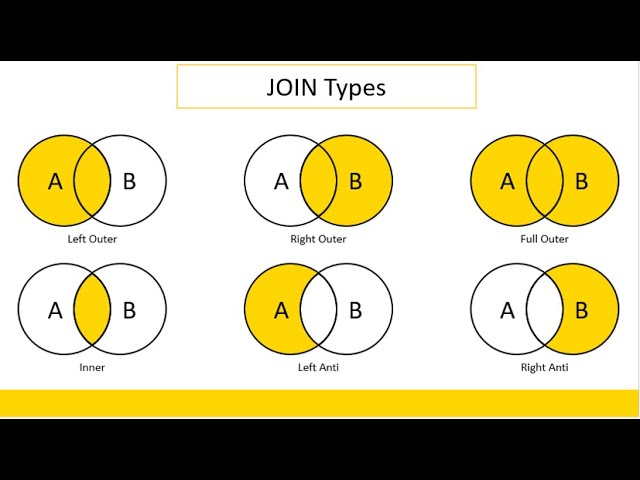

In [23]:
from IPython.display import Image
Image('https://i.stack.imgur.com/vb1V6.png')

In [24]:
autores = spark.read.parquet('./databases/AUTORES.parquet')
livros = spark.read.parquet('./databases/LIVROS.parquet')
clientes = spark.read.parquet('./databases/CLIENTES.parquet')
compras = spark.read.parquet('./databases/COMPRAS.parquet')


### Left Outer

In [25]:
autores.join(other = livros, on = 'id', how = 'left')

id,titulo,autor,cnpj_editora,data_lancamento,ean,isbn10,numero_paginas,preco
106042959,1984,George Orwell,null,null,null,null,null,null
017551704,200 Crônicas Esco...,Rubem Braga,14.857.032/0001-12,2018-10-19,2352660010751,0-7433-6026-5,645,44.38
054099410,A Alma Encantador...,João do Rio,null,null,null,null,null,null
128422117,A Biblioteca da M...,Matt Haig,null,null,null,null,null,null
049141399,A Coleira do Cão,Rubem Fonseca,null,null,null,null,null,null
065490862,A Cor Púrpura,Alice Walker,null,null,null,null,null,null
029077001,A Educação Sentim...,Gustave Flaubert,null,null,null,null,null,null
032275599,A Escrava Isaura,Bernardo Guimarães,49.037.512/0001-11,2001-05-15,2964406383663,1-83335-705-1,752,184.42
090690941,A Estrela Sobe,Marques Rebelo,null,null,null,null,null,null
095695255,A Hora da Estrela,Clarice Lispector,94.567.038/0001-94,2015-04-23,4084520465552,0-7650-7381-1,572,83.33


### Right Outer

In [26]:
autores.join(other = livros, on = 'id', how = 'right')

id,titulo,autor,cnpj_editora,data_lancamento,ean,isbn10,numero_paginas,preco
102961160,null,null,54.317.982/0001-79,2011-09-19,4367115749184,0-06-594558-1,516,113.84
043636240,null,null,16.938.042/0001-08,2019-05-11,1239569754256,0-611-23680-X,371,207.67
052928059,null,null,57.624.038/0001-52,2003-08-03,5462162528221,1-109-29542-1,198,107.89
088482271,null,null,16.249.378/0001-63,2022-09-07,5713629047213,1-229-68842-0,632,143.95
028125446,null,null,90.425.178/0001-77,2011-07-25,2226757040245,0-657-66391-3,384,156.49
055610005,null,null,20.756.194/0001-67,2006-03-22,2114468195241,0-455-43278-3,419,37.08
049806867,null,null,93.617.240/0001-10,2022-02-17,3166123637398,1-4822-8784-6,378,162.97
102803370,null,null,48.760.531/0001-09,2011-12-13,2550608407612,0-399-05121-X,732,75.62
084858867,null,null,10.752.843/0001-06,2015-04-30,6207011925788,1-03-549652-6,635,237.67
059303729,null,null,05.129.783/0001-21,2001-08-25,1641133648784,0-620-46508-5,107,61.41


### Full Outer

In [27]:
autores.join(other = livros, on = 'id', how = 'full')

id,titulo,autor,cnpj_editora,data_lancamento,ean,isbn10,numero_paginas,preco
010033025,null,null,06.849.371/0001-29,2005-07-05,3363492241854,1-196-97629-5,095,80.63
010045097,Moby Dick,Herman Melville,93.167.508/0001-60,2003-12-17,5404258649298,1-198-80360-6,209,138.69
010249547,null,null,10.345.968/0001-03,2017-12-04,7005400578046,0-7705-1411-1,246,81.2
010325500,A Obscena Senhora D,Hilda Hilst,27.689.540/0001-80,2000-09-09,8793472196570,0-933627-98-X,306,30.62
010366161,Lucíola,José de Alencar,70.293.541/0001-30,2022-02-18,9429320742345,0-356-75493-6,968,200.6
010409138,Romanceiro da Inc...,Cecília Meireles,null,null,null,null,null,null
010745876,Gargântua e Panta...,François Rabelais,01.427.369/0001-48,2017-06-12,0666233842154,0-14-758390-X,910,237.77
010838220,Ficções,Jorge Luis Borges,34.927.681/0001-50,2009-06-15,7773545068127,0-536-43094-2,368,129.9
011195894,Journey to the En...,Louis-Ferdinand C...,null,null,null,null,null,null
011247991,Lavoura Arcaica,Raduan Nassar,97.352.048/0001-09,2009-05-03,1126815895613,0-625-59780-X,616,106.29


### Inner Join

In [28]:
autores.join(other = livros, on = 'id', how = 'inner')

id,titulo,autor,cnpj_editora,data_lancamento,ean,isbn10,numero_paginas,preco
080608956,Viva o Povo Brasi...,João Ubaldo Ribeiro,90.563.247/0001-09,2011-10-05,0332981484891,1-925760-25-1,203,107.63
018453254,Grande Sertão: Ve...,Guimarães Rosa,95.367.280/0001-87,2012-11-02,0507454098268,0-609-21722-4,043,52.94
021765997,As Aventuras de H...,Mark Twain,59.374.801/0001-60,2014-05-17,4743679337089,1-85580-232-5,499,143.43
023911383,Catatau,Paulo Leminski,98.526.047/0001-98,2005-11-12,4165252098109,1-369-22273-4,599,121.0
030099528,Retrato do Artist...,James Joyce,28.103.975/0001-64,2000-02-06,9164658045347,0-904222-71-3,292,208.39
030334762,Em Busca do Tempo...,Marcel Proust,80.463.719/0001-06,2013-05-08,7122725133429,0-85193-340-8,099,123.47
035940339,Adeus às Armas,Ernest Hemingway,71.530.496/0001-53,2014-08-11,6764222732753,1-396-90787-4,327,213.6
026925428,"Sing, Unburied, S...",Jesmyn Ward,97.156.423/0001-37,2011-09-04,7828100308177,0-491-15648-0,793,193.19
010045097,Moby Dick,Herman Melville,93.167.508/0001-60,2003-12-17,5404258649298,1-198-80360-6,209,138.69
010366161,Lucíola,José de Alencar,70.293.541/0001-30,2022-02-18,9429320742345,0-356-75493-6,968,200.6


In [29]:
compras.join(other = livros,on = compras.cd_livro == livros.id, how='inner').show(10)

+------+---------------------+----------------+----------------+----------+-------------------------+----------+--------+---------------+--------------------+-----------+---------+----------+---------+------------------+---------------+-------------+-------------+--------------+------+
|    id|cartao_data_expiracao|   cartao_numero| cartao_bandeira|cartao_cvc|codigo_transacao_bancaria|      data|    hora|           ipv4|                ipv6|cep_entrega| cd_livro|cd_cliente|       id|      cnpj_editora|data_lancamento|          ean|       isbn10|numero_paginas| preco|
+------+---------------------+----------------+----------------+----------+-------------------------+----------+--------+---------------+--------------------+-----------+---------+----------+---------+------------------+---------------+-------------+-------------+--------------+------+
|012389|                11/25|5500804500517692|        Discover|       959|     GB98MPIH622108593...|2021-07-24|03:21:28|  62.145.31.164|b2

In [30]:
#Using multiple conditions
cond = [compras.cd_livro == livros.id,livros.preco <20]
compras.join(livros,cond,'inner').show(4)

+------+---------------------+----------------+--------------------+----------+-------------------------+----------+--------+---------------+--------------------+-----------+---------+----------+---------+------------------+---------------+-------------+-------------+--------------+-----+
|    id|cartao_data_expiracao|   cartao_numero|     cartao_bandeira|cartao_cvc|codigo_transacao_bancaria|      data|    hora|           ipv4|                ipv6|cep_entrega| cd_livro|cd_cliente|       id|      cnpj_editora|data_lancamento|          ean|       isbn10|numero_paginas|preco|
+------+---------------------+----------------+--------------------+----------+-------------------------+----------+--------+---------------+--------------------+-----------+---------+----------+---------+------------------+---------------+-------------+-------------+--------------+-----+
|013478|                07/24|3560452545224585|       VISA 16 digit|       126|     GB63LUHF437452702...|2020-05-10|02:33:28|105.1

### Cross

In [50]:
(
compras.join(other = livros,on = compras.cd_livro == livros.id, how='cross')
.orderBy('cartao_cvc')
.show(3)

)

+------+---------------------+----------------+--------------------+----------+-------------------------+----------+--------+--------------+--------------------+-----------+---------+----------+---------+------------------+---------------+-------------+-------------+--------------+------+
|    id|cartao_data_expiracao|   cartao_numero|     cartao_bandeira|cartao_cvc|codigo_transacao_bancaria|      data|    hora|          ipv4|                ipv6|cep_entrega| cd_livro|cd_cliente|       id|      cnpj_editora|data_lancamento|          ean|       isbn10|numero_paginas| preco|
+------+---------------------+----------------+--------------------+----------+-------------------------+----------+--------+--------------+--------------------+-----------+---------+----------+---------+------------------+---------------+-------------+-------------+--------------+------+
|256948|                08/26|  30527022186510|    American Express|       000|     GB44XNMM489278674...|2021-08-23|17:32:38|165.1

### Anti

In [51]:
(
compras.join(other = livros,on = compras.cd_livro == livros.id, how='anti')
.orderBy('cartao_cvc')
.show(3)

)

+---+---------------------+-------------+---------------+----------+-------------------------+----+----+----+----+-----------+--------+----------+
| id|cartao_data_expiracao|cartao_numero|cartao_bandeira|cartao_cvc|codigo_transacao_bancaria|data|hora|ipv4|ipv6|cep_entrega|cd_livro|cd_cliente|
+---+---------------------+-------------+---------------+----------+-------------------------+----+----+----+----+-----------+--------+----------+
+---+---------------------+-------------+---------------+----------+-------------------------+----+----+----+----+-----------+--------+----------+



### Semi

In [52]:
(
compras.join(other = livros,on = compras.cd_livro == livros.id, how='semi')
.orderBy('cartao_cvc')
.show(3)

)

+------+---------------------+----------------+--------------------+----------+-------------------------+----------+--------+--------------+--------------------+-----------+---------+----------+
|    id|cartao_data_expiracao|   cartao_numero|     cartao_bandeira|cartao_cvc|codigo_transacao_bancaria|      data|    hora|          ipv4|                ipv6|cep_entrega| cd_livro|cd_cliente|
+------+---------------------+----------------+--------------------+----------+-------------------------+----------+--------+--------------+--------------------+-----------+---------+----------+
|256948|                08/26|  30527022186510|    American Express|       000|     GB44XNMM489278674...|2021-08-23|17:32:38|165.162.171.90|9b9a:12e1:6049:64...|  15211-532|020600053|   2245148|
|372954|                04/31|3571126194571481|Diners Club / Car...|       000|     GB19FPAT788326312...|2022-07-10|17:16:49|  183.70.38.94|cfb8:45c3:cf6:d61...|   61775443|017063409|   7705175|
|347602|                0

# Alias

In [55]:
(
df.groupBy('estado')
.agg(F.count('*').alias('Quantidade'))
.show(10)
)

+------+----------+
|estado|Quantidade|
+------+----------+
|    SC|        44|
|    RO|        39|
|    PI|        35|
|    AM|        34|
|    RR|        33|
|    GO|        45|
|    TO|        34|
|    MT|        29|
|    SP|        49|
|    ES|        38|
+------+----------+
only showing top 10 rows



# Union

In [69]:
dfDup = livros = spark.read.parquet('./databases/LIVROS.parquet')
dfDupliLivro = livros.union(dfDup)
dfDupliLivro.show()

+---------+------------------+---------------+-------------+-------------+--------------+------+
|       id|      cnpj_editora|data_lancamento|          ean|       isbn10|numero_paginas| preco|
+---------+------------------+---------------+-------------+-------------+--------------+------+
|102961160|54.317.982/0001-79|     2011-09-19|4367115749184|0-06-594558-1|           516|113.84|
|043636240|16.938.042/0001-08|     2019-05-11|1239569754256|0-611-23680-X|           371|207.67|
|052928059|57.624.038/0001-52|     2003-08-03|5462162528221|1-109-29542-1|           198|107.89|
|088482271|16.249.378/0001-63|     2022-09-07|5713629047213|1-229-68842-0|           632|143.95|
|028125446|90.425.178/0001-77|     2011-07-25|2226757040245|0-657-66391-3|           384|156.49|
|055610005|20.756.194/0001-67|     2006-03-22|2114468195241|0-455-43278-3|           419| 37.08|
|049806867|93.617.240/0001-10|     2022-02-17|3166123637398|1-4822-8784-6|           378|162.97|
|102803370|48.760.531/0001-09|

# Drop Duplicates

In [73]:
dfDupliLivro.dropDuplicates()


id,cnpj_editora,data_lancamento,ean,isbn10,numero_paginas,preco
052928059,57.624.038/0001-52,2003-08-03,5462162528221,1-109-29542-1,198,107.89
106740400,38.759.012/0001-77,2002-06-04,5285919725830,1-259-58568-9,750,101.75
053055882,49.307.825/0001-42,2012-11-28,7167295362435,0-938193-52-X,209,25.48
066137179,39.048.726/0001-30,2009-07-29,8506933121253,1-4076-7531-1,511,137.59
084858867,10.752.843/0001-06,2015-04-30,6207011925788,1-03-549652-6,635,237.67
020600053,48.235.609/0001-76,2009-04-16,1659684622498,0-566-37606-7,553,147.71
031345103,46.732.150/0001-90,2005-10-05,4903478185889,1-903929-82-2,784,211.47
021673584,45.391.672/0001-03,2016-04-01,3082795652555,1-939599-03-2,775,39.67
080608956,90.563.247/0001-09,2011-10-05,0332981484891,1-925760-25-1,203,107.63
037289959,59.420.681/0001-90,2000-05-17,3783551239774,1-4158-9787-5,125,145.34


# Column Functions

In [94]:
(
    df
    .withColumn('tel',F.regexp_replace('telefone','(\D)','').cast('int'))
    .orderBy(F.asc('tel'))
    .orderBy(F.asc_nulls_first('tel'))
    
    # .printSchema()
    # .show(12)
)

cpf,email,senha,data_de_nascimento,estado,data_cadastro,ipv4,cor_favorita,profissao,telefone,tel
786.132.594-64,vinicius86@yahoo....,)0UFwLnQeY,1935-07-29,MA,2023-02-25,142.49.53.78,Amarelo,Geólogo,+55 41 8499 1550,null
486.970.253-38,isabelly04@uol.co...,9n8Gsa#7&*,1934-11-26,AM,2023-03-03,30.212.117.133,Ciano,Triatleta,+55 51 5926 5593,null
957.184.360-10,thomas46@hotmail.com,(nHUASneS4,1993-03-13,CE,2023-02-25,192.177.35.142,Roxo,Judoca,(084) 3806-6915,null
493.705.168-75,rezendeisaac@hotm...,_O_2GRnGOe,1992-06-17,GO,2023-02-16,197.11.26.213,Ciano,Atleta De Arremes...,(031) 0803-6753,null
573.619.804-57,hnogueira@ig.com.br,&9Ejtll$PF,1949-03-06,SP,2023-01-27,168.162.247.252,Cinza,Instalador De Lin...,(031) 9148 3933,null
092.618.354-06,stellamoraes@bol....,mw0AWYAs#s,2021-06-01,AC,2023-01-08,26.121.127.94,Marrom,Aeromoça,+55 (071) 3033 9177,null
170.965.428-76,qdias@gmail.com,6z5AgU_##v,1995-08-17,GO,2023-02-02,197.248.140.141,Verde,Auditor,84 9168 0488,null
218.795.460-94,da-conceicaodavi-...,uhBbFxPA&9,1986-05-19,MG,2023-03-07,192.93.0.24,Rosa,Taxista,+55 84 0652 9691,null
475.698.032-56,wnunes@bol.com.br,_8az1W%n7g,1996-05-12,SE,2023-02-04,139.196.176.154,Azul,Cadeirinha,(071) 1640-3388,null
348.215.690-51,omoreira@bol.com.br,!8maDkdVnY,2008-10-24,MG,2023-02-20,177.2.242.176,Verde Escuro,Adestrador De Ani...,+55 61 3217-9930,null


In [106]:
(
df
# .where(F.year('data_de_nascimento').between(2012,2015))
# .where(F.col('email').contains('joao'))
# .where(F.col('email').endswith('.br'))
.where(F.col('estado').isin('SP','RJ'))
.where(F.col('telefone').isNotNull())
)

cpf,email,senha,data_de_nascimento,estado,data_cadastro,ipv4,cor_favorita,profissao,telefone
615.790.842-49,brenda39@ig.com.br,XS$84Hpsnw,1964-02-01,RJ,2023-02-16,21.252.226.29,Branco,Promotor De Vendas,+55 (021) 4751 2004
573.619.804-57,hnogueira@ig.com.br,&9Ejtll$PF,1949-03-06,SP,2023-01-27,168.162.247.252,Cinza,Instalador De Lin...,(031) 9148 3933
734.801.926-96,pedro-miguel43@bo...,*72CCJdxX0,1965-09-14,SP,2023-02-22,222.145.189.67,Roxo,Coach,51 9026 3441
869.072.315-30,luiz-gustavorocha...,$62UN05c(9,1980-10-19,SP,2023-01-04,53.167.75.100,Verde Claro,Lactarista Hospit...,+55 31 1296 8466
384.716.209-87,talmeida@hotmail.com,k8IP9(Kz_v,1955-04-23,RJ,2023-03-06,120.159.158.101,Violeta,Catador De Materi...,+55 (051) 5573 2964
291.358.407-14,lavinia54@ig.com.br,NyI@+8Kd!1,1982-01-28,SP,2023-02-26,79.132.46.55,Preto,Profissional De R...,+55 51 5526 8284
460.125.983-51,lazevedo@gmail.com,uC0O7QdE&B,1972-07-14,SP,2023-01-24,221.155.104.128,Preto,Atleta De Arremes...,+55 71 9251-1645
837.410.256-07,martinsmaysa@bol....,(Z8RNs%un6,1972-08-21,SP,2023-02-24,157.119.230.252,Cinza,Laboratorista,+55 (084) 4945-6200
730.184.526-07,fviana@ig.com.br,1(3oLDln$8,1938-10-23,SP,2023-03-02,99.31.171.138,Verde Escuro,Profissional De I...,0900-429-5628
248.376.051-17,dmoura@hotmail.com,k7&TpiJa%b,2022-09-01,RJ,2023-02-25,84.59.19.142,Branco,Jogador De Handebol,+55 (021) 3753-6334


# Pivot

In [124]:
(
    compras
    .withColumn('mes',F.date_format('data','MMMM'))
    .groupBy('cartao_bandeira', 'mes')
    .pivot('mes',['January','February'])
    .agg(F.count('*').alias('Quantidade'))
    
)

cartao_bandeira,mes,January,February
Discover,June,null,null
American Express,February,null,353
VISA 19 digit,July,null,null
American Express,May,null,null
VISA 19 digit,October,null,null
American Express,December,null,null
VISA 16 digit,November,null,null
Mastercard,August,null,null
JCB 16 digit,July,null,null
JCB 15 digit,March,null,null
